In [2]:
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
import matplotlib.pyplot as plt 
import random as ran 
import numpy as np 

hello = tf.constant('Hello, We are trying out TensorFlow in this Lab!') 
sess = tf.Session() 
print(sess.run(hello))


b'Hello, We are trying out TensorFlow in this Lab!'


In [3]:
#Load MNIST dataset.
warnings.filterwarnings(action='once')
from tensorflow.examples.tutorials.mnist import input_data 
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Q1- Explain this portion of the code.

### Answer: The above code downloads the data and saves it to the MNIST_data folder, and processes it so that data is in one hot encoded format and assign to mnist variable.


## Q2- what is the usage of one_hot in read_data_sets() command

##### mnist = input_data.read_data_sets('MNIST_data', one_hot=True) 

### Answer: One hot enables conversion of a categorical variable to number. So it will essentially create a vector of numbers.


In [6]:
# Functions that can define the size of train and test sets 
def TRAIN_SIZE(num): 
    print ('Total Training Images in Dataset = ' + 
           str(mnist.train.images.shape)) 
    print ('--------------------------------------------------') 
    x_train = mnist.train.images[:num,:] 
    print ('x_train Examples Loaded = ' 
           + str(x_train.shape)) 
    y_train = mnist.train.labels[:num,:] 
    print ('y_train Examples Loaded = ' 
           + str(y_train.shape)) 
    print('') 
    return x_train, y_train 

def TEST_SIZE(num): 
    print ('Total Test Examples in Dataset = ' 
           + str(mnist.test.images.shape)) 
    print ('--------------------------------------------------') 
    x_test = mnist.test.images[:num,:] 
    print ('x_test Examples Loaded = ' 
           + str(x_test.shape)) 
    y_test = mnist.test.labels[:num,:] 
    print ('y_test Examples Loaded = ' 
           + str(y_test.shape)) 
    return x_test, y_test

In [7]:
#Define some functions that will help us in future for plotting some graphs.
def display_digit(num): 
    print (y_train[num])
    label = y_train[num].argmax(axis=0) 
    image = x_train[num].reshape([28,28]) 
    plt.title('Example: %d Label: %d' % (num, label)) 
    plt.imshow(image, cmap=plt.get_cmap('gray_r')) 
    plt.show() 

def display_mult_flat(start, stop): 
    images = x_train[start].reshape([1,784]) 
    for i in range(start+1,stop): 
        images = np.concatenate((images, x_train[i].reshape([1,784]))) 
    plt.imshow(images, cmap=plt.get_cmap('gray_r')) 
    plt.show()

In [8]:
x_train, y_train = TRAIN_SIZE(55000)
x_test, y_test = TEST_SIZE(10000)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (10000, 784)
y_test Examples Loaded = (10000, 10)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


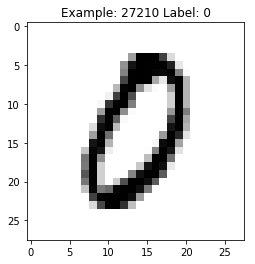

In [9]:
display_digit(ran.randint(0, x_train.shape[0]))

In [ ]:
import tensorflow as tf

In [10]:
#Open a session
sess = tf.Session()

# Input and output 
x = tf.placeholder(tf.float32, shape=[None, 784]) # input image 28*28 = 784 
y_ = tf.placeholder(tf.float32, shape=[None, 10]) #0-9 digits (10 classes) 


In [11]:
# Model parameters 
W = tf.Variable(tf.zeros([784, 10])) 
b = tf.Variable(tf.zeros([10]))

In [12]:
#The best output activation node for multiclass will be softmax which is implemented here
y = tf.nn.softmax(tf.matmul(x,W) + b)

## Q3- It appears that tf.placeholder() , tf.Variable() and tf.constant() all are for assigning variables so what is the difference between them?  

### Answer: 
### tf.placeholder does not need an initial value and it can be assigned at the run time with the feed_dict argument inside Session.run
### For tf.variable, an initial value has to be assigned while declaring the variable. Variables are trained over time, whereas a placeholder is just an input data that doesn't change as the model is trained. This makes placeholders good for input images, and class labels for those images. And variables are apt for weights, biases etc. 
### tf.constant creates a constant tensor.  tf.constant supports arbitrary constants, not just uniform scalar Tensors. As tf.constant only embeds constant values in the graph, it does not support dynamic shapes based on other runtime Tensors.

In [13]:
#Initialize variables
init = tf.global_variables_initializer()
sess.run(init)
#Train the model
LEARNING_RATE = 0.1 

In [14]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1])) 

In [15]:
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

In [16]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [17]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Q4- Write a few sentences about tf.train.GradientDescentOptimizer and tf.equal commands. What is the effect of tf.argmax().

### Answer: 
### tf.train.GradientDescentOptimizer is an optimizer that implements the gradient descent algorithm. 
#### The major line of interest here is training = tf.train.GradientDescentOptimizer(0.01).minimize(error) where the training step is defined. It aims to minimise the value of the error Variable, which is defined earlier as the cross_entropy. The 0.01 is the LEARNING_RATE - each step it takes to try learn a better value.

### tf.equal is an elementwise operator command. Returns the truth value of (x == y) element-wise
#### tf.equal() determines if the element in the first tensor equals the one in the second. We get an array of bools (True and False)

### tf.argmax() - Returns the index with the largest value across axes of a tensor.
#### Example: tf.argmax(input, axis=None, name=None, dimension=None)
#### input is a Tensor and axis describes which axis of the input Tensor to reduce across. For vectors, use axis = 0. Returns the index with the largest value across axis of a tensor


In [18]:
#Repeat the training steps based on the number of epochs defined.
TRAIN_STEPS = 250 

In [ ]:
for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + ' Accuracy = ' + 
        str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + ' Loss = ' + 
        str(sess.run(cross_entropy, {x: x_train, y_: y_train})))

## Q5- Explain this part of the code In the code, 

### Answer: 
### The model is trained TRAIN_STEPS times using the for loop. In each loop, the values of x_train and y_train are passed to gradient descent optimizer by calling training to optimize the prediction. The second piece in the code is printing loss and accuracy on testing data. In this piece, the code is printing accuracy and loss value on testing data for all the run where the i/100==0.


In [ ]:
#Add new layer
#We are going to add two hidden layers. Input layer has 784 nodes. First hidden layer has 100 nodes. 
#Second hidden layer has 30 nodes. The output layer has 10 nodes.

# Input and output 
X = tf.placeholder(tf.float32, shape=[None, 784]) # input image 28*28 = 784 
Y_ = tf.placeholder(tf.float32, shape=[None, 10]) #0-9 digits (10 classes) 

# Two hidden layers, output layer and their number of neurons (the last layer has 10 softmax neurons) 
L = 100 
M = 30

# tf.truncated_normal is a TensorFlow function that produces random values following the normal (Gaussian) distribution between -2*stddev and +2*stddev 
W1 = tf.Variable(tf.truncated_normal([784, L], stddev=0.1)) # 784 = 28 * 28 
B1 = tf.Variable(tf.zeros([L])) 
W2 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1)) 
B2 = tf.Variable(tf.zeros([M])) 
W3 = tf.Variable(tf.truncated_normal([M, 10], stddev=0.1)) 
B3 = tf.Variable(tf.zeros([10]))

# The model 
XX = tf.reshape(X, [-1, 784]) 
Y1 = tf.nn.sigmoid(tf.matmul(XX, W1) + B1) 
Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + B2) 
Ylogits = tf.matmul(Y2, W3) + B3 
Y = tf.nn.softmax(Ylogits)

# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100 images 
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability 
# problems with log(0) which is NaN 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_) 
cross_entropy = tf.reduce_mean(cross_entropy)*100 
# accuracy of the trained model, between 0 (worst) and 1 (best) 
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1)) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#Training step and initialization 
# init 
init = tf.global_variables_initializer() 
sess = tf.Session() 
sess.run(init)

In [ ]:
LEARNING_RATE = 0.01 
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1])) 
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy) 
#correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1)) 
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 
TRAIN_STEPS = 1000 

for i in range(TRAIN_STEPS+1): 
    sess.run(training, feed_dict={X: x_train, Y_: y_train}) 
    if i%100 == 0: 
        print('Training Step:' + str(i) + ' Accuracy = ' + 
              str(sess.run(accuracy, feed_dict={X: x_test, Y_: y_test})) + ' Loss = ' + 
              str(sess.run(cross_entropy, {X: x_train, Y_: y_train})))


In [ ]:
#DropOut

# Input and output 
X = tf.placeholder(tf.float32, shape=[None, 784]) # input image 28*28 = 784 
Y_ = tf.placeholder(tf.float32, shape=[None, 10]) #0-9 digits (10 classes) 
pkeep = tf.placeholder(tf.float32) 
L = 100 
M = 30 
N = 60 
O = 30 
# tf.truncated_normal is a TensorFlow function that produces random values following the normal (Gaussian) distribution between -2*stddev and +2*stddev 
W1 = tf.Variable(tf.truncated_normal([784, L], stddev=0.1)) # 784 = 28 * 28 
B1 = tf.Variable(tf.ones([L])/10) 
W2 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1)) 
B2 = tf.Variable(tf.ones([M])/10) 
W3 = tf.Variable(tf.truncated_normal([M, 10], stddev=0.1)) 
B3 = tf.Variable(tf.zeros([10])) 
# The model 
XX = tf.reshape(X, [-1, 784]) 
Y1 = tf.nn.relu(tf.matmul(XX, W1) + B1) 
Y1d = tf.nn.dropout(Y1, pkeep) 
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + B2) 
Y2d = tf.nn.dropout(Y2, pkeep) 
Ylogits = tf.matmul(Y2d, W3) + B3 
Y = tf.nn.softmax(Ylogits)

# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100 images 
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability 
# problems with log(0) which is NaN 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits, labels=Y_) 
cross_entropy = tf.reduce_mean(cross_entropy)*100

# accuracy of the trained model, between 0 (worst) and 1 (best) 
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1)) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

# init 
init = tf.global_variables_initializer() 
sess = tf.Session() 
sess.run(init) 
LEARNING_RATE = 0.01 

#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1])) 
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
#correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
TRAIN_STEPS = 1000
for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={X: x_train, Y_: y_train, pkeep: 0.75 }) 
    if i%100 == 0:
        print('Training Step:' + str(i) + ' Accuracy = ' + 
          str(sess.run(accuracy, feed_dict={X: x_test, Y_: y_test, pkeep: 1.0})) + 
          ' Loss = ' + str(sess.run(cross_entropy, {X: x_train, Y_: y_train , pkeep: 0.75})))

## Step 3. Stochastic Gradient Descent

#### As discussed in class, the best way of addressing the deep neural network is through making smaller batches of data. Please make batches of 200 data and design a deep neural network with four hidden layer, ReLU as hidden layer activation function and softmax as the output activation layer. Please consider dropout for all the layers.

In [ ]:
TRAIN_STEPS = 150
batch_size = 200
for epoch in range(TRAIN_STEPS):
    batch_count = int(mnist.train.num_examples/batch_size)
    for i in range(batch_count):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(training, feed_dict={X: batch_x, Y_: batch_y, pkeep: 0.75})
    if epoch%100 == 0:
        print ("Epoch: ", epoch)
        print ("Accuracy: ", str(sess.run(accuracy, feed_dict={X: mnist.test.images, Y_: mnist.test.labels, pkeep: 1.0})))